# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [2]:
cancer_df = pd.read_csv("breast-cancer-wisconsin-data.csv")

In [3]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

In [4]:
cancer_df.drop("ID",inplace=True,axis = 1)

In [5]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(9), object(1)
memory usage: 51.9+ KB


In [6]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(9), object(1)
memory usage: 51.9+ KB


In [7]:
cancer_df.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [8]:
cancer_df.describe()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [9]:
cancer_df.shape

(699, 10)

In [10]:
cancer_df.dtypes

ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [11]:
# We could see "?" values in column, this should be removed from data set
cancer_df.loc[cancer_df['Bare Nuclei']=='?'].shape
# Check for missing value in any other column

(16, 10)

In [12]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?
cancer_df = cancer_df.replace('?', np.nan)

In [13]:
cancer_df[cancer_df.isnull().any(axis=1)]

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
23,8,4,5,1,2,NaN,7,3,1,4
40,6,6,6,9,6,NaN,7,8,1,2
139,1,1,1,1,1,NaN,2,1,1,2
145,1,1,3,1,2,NaN,2,1,1,2
158,1,1,2,1,3,NaN,1,1,1,2
164,5,1,1,1,2,NaN,3,1,1,2
235,3,1,4,1,2,NaN,3,1,1,2
249,3,1,1,1,2,NaN,3,1,1,2
275,3,1,3,1,2,NaN,2,1,1,2
292,8,8,8,1,2,NaN,6,10,1,4


In [14]:
cancer_df['Bare Nuclei'] = cancer_df['Bare Nuclei'].astype('float64')

In [15]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [16]:
cancer_df = cancer_df.apply(lambda x: x.fillna(x.median()),axis=0)

In [17]:
cancer_df[cancer_df.duplicated()].any()

ClumpThickness                 True
Cell Size                      True
Cell Shape                     True
Marginal Adhesion              True
Single Epithelial Cell Size    True
Bare Nuclei                    True
Normal Nucleoli                True
Bland Chromatin                True
Mitoses                        True
Class                          True
dtype: bool

In [18]:
cancer_df = cancer_df.drop_duplicates()

In [19]:
cancer_df.shape

(457, 10)

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [20]:
# Check for correlation of variable
cancer_df.corr(method='pearson')

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,1.000000,0.572961,0.585051,0.376395,0.424863,0.505154,0.490478,0.444999,0.293701,0.671929
Cell Size,0.572961,1.000000,0.876257,0.636158,0.686596,0.584168,0.710696,0.653571,0.401360,0.754380
Cell Shape,0.585051,0.876257,1.000000,0.608572,0.645747,0.610110,0.685179,0.651476,0.379111,0.755177
Marginal Adhesion,0.376395,0.636158,0.608572,1.000000,0.523539,0.586841,0.608256,0.509574,0.355714,0.618088
Single Epithelial Cell Size,0.424863,0.686596,0.645747,0.523539,1.000000,0.477419,0.550626,0.554593,0.432699,0.600130
Bare Nuclei,0.505154,0.584168,0.610110,0.586841,0.477419,1.000000,0.600113,0.466019,0.263617,0.756300
Normal Nucleoli,0.490478,0.710696,0.685179,0.608256,0.550626,0.600113,1.000000,0.604270,0.276981,0.704781
Bland Chromatin,0.444999,0.653571,0.651476,0.509574,0.554593,0.466019,0.604270,1.000000,0.367106,0.636002
Mitoses,0.293701,0.401360,0.379111,0.355714,0.432699,0.263617,0.276981,0.367106,1.000000,0.357504
Class,0.671929,0.754380,0.755177,0.618088,0.600130,0.756300,0.704781,0.636002,0.357504,1.000000


In [21]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

D:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


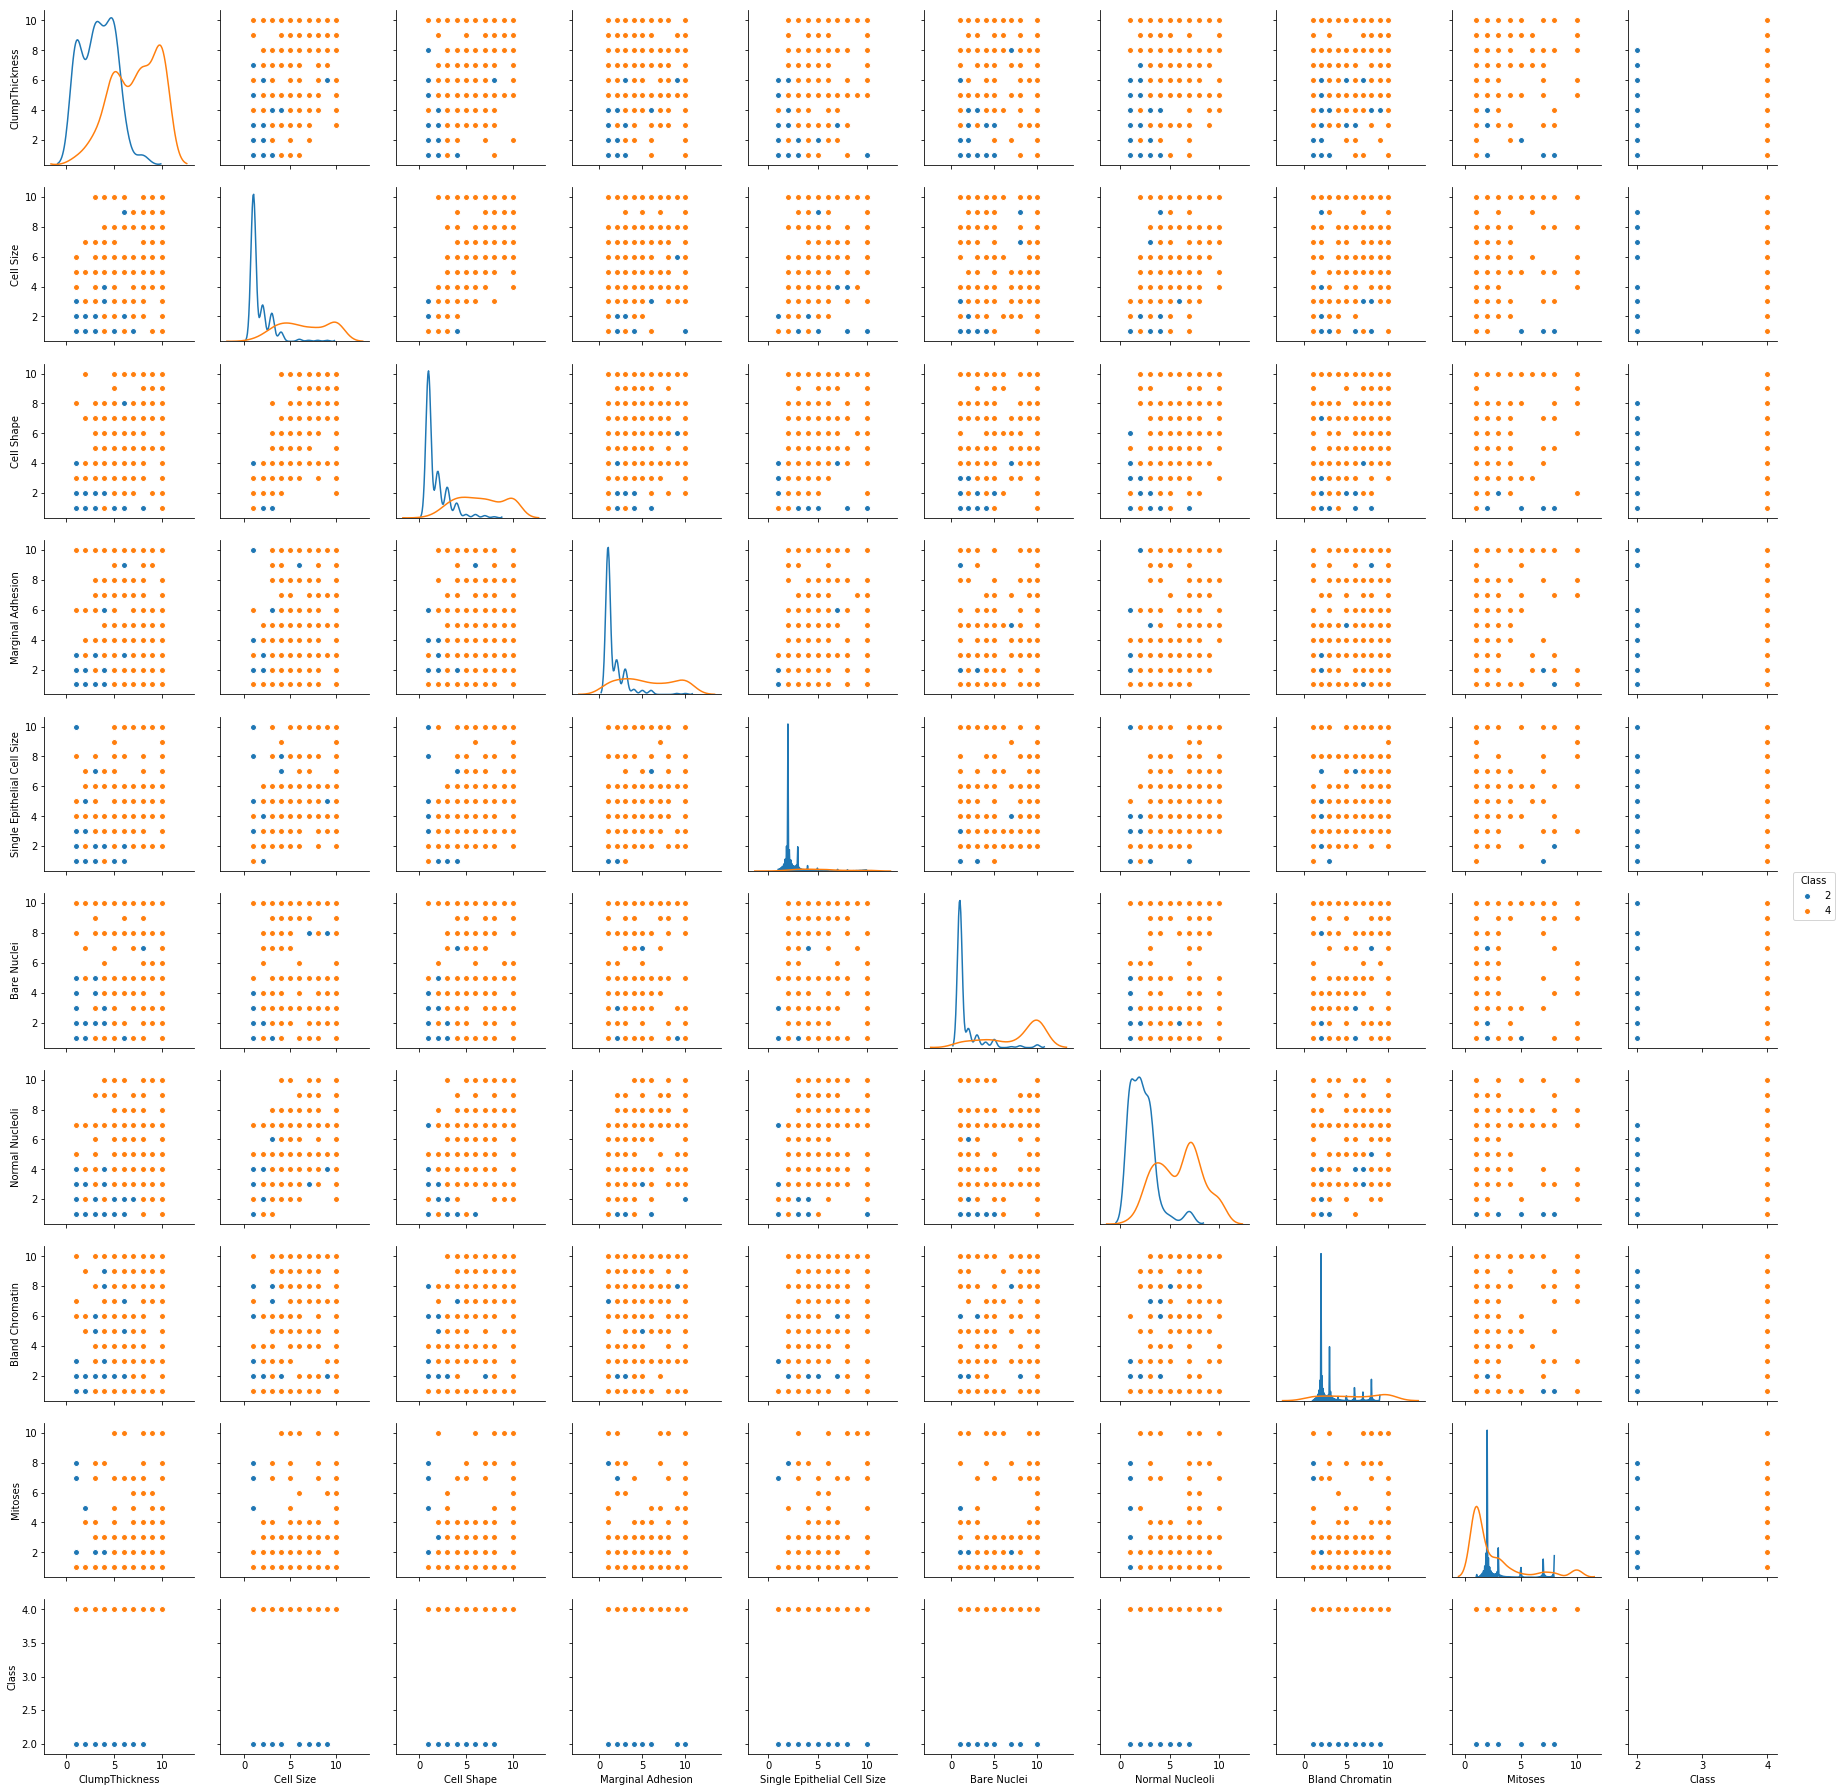

In [22]:
#Let us check for pair plots
sns.pairplot(cancer_df, hue = 'Class',diag_kind='kde')

In [23]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [24]:
# We could see most of the outliers are now removed.

In [25]:
from scipy.stats import zscore

cancer_df_z = cancer_df.apply(zscore)
cancer_df_z.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,-0.128603,-0.993808,-1.050717,-0.864384,-0.763716,-0.965209,-0.453018,-0.838199,-0.437224,-1.042477
1,-0.128603,-0.066930,-0.089079,0.403749,1.279716,1.357731,-0.453018,-0.543086,-0.437224,-1.042477
2,-0.828263,-0.993808,-1.050717,-0.864384,-0.763716,-0.707105,-0.453018,-0.838199,-0.437224,-1.042477
3,0.221227,1.168907,1.193104,-0.864384,-0.355030,-0.190896,-0.453018,0.932480,-0.437224,-1.042477
4,-0.478433,-0.993808,-1.050717,-0.230317,-0.763716,-0.965209,-0.453018,-0.838199,-0.437224,-1.042477


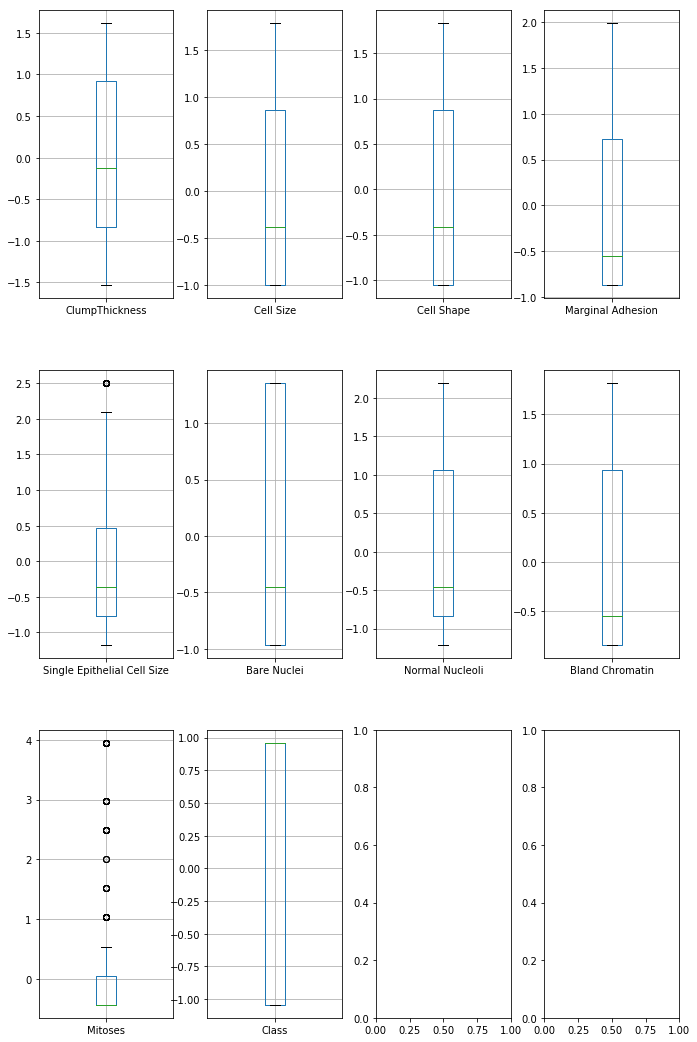

In [26]:
fig, axes = plt.subplots(3,4,figsize=(10, 10))
fig.subplots_adjust(left=0.1, bottom=0.1,right=0.99, top=1.5, wspace=0.25, hspace=0.25)
for i, el in enumerate(list(cancer_df_z.columns.values)[:]):
    a = cancer_df_z.boxplot(el,ax=axes.flatten()[i])

In [27]:
# Handling Outliers - Removing outliers > 2 sigma
cancer_df_z1 = cancer_df_z[cancer_df_z[cancer_df_z.iloc[:,0:10]>2].isnull()].dropna()
cancer_df_z1.shape

(394, 10)

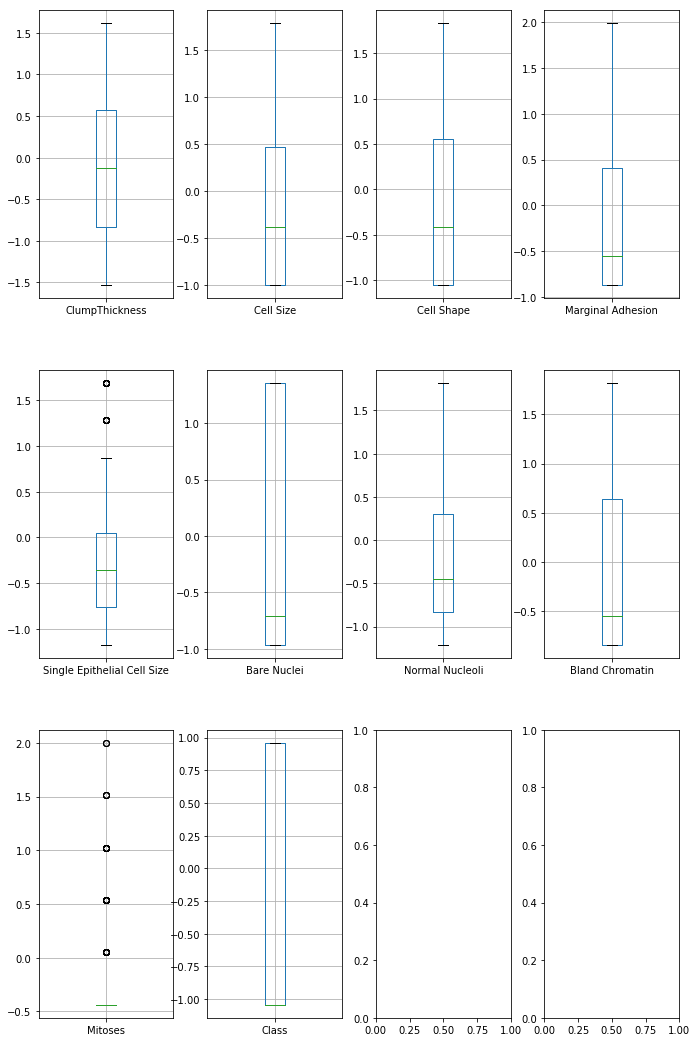

In [28]:
fig, axes = plt.subplots(3,4,figsize=(10, 10))
fig.subplots_adjust(left=0.1, bottom=0.1,right=0.99, top=1.5, wspace=0.25, hspace=0.25)
for i, el in enumerate(list(cancer_df_z1.columns.values)[:]):
    a = cancer_df_z1.boxplot(el,ax=axes.flatten()[i])

# Q6 Create a covariance matrix for identifying Principal components

In [29]:
#removing the target variable 
cancer_df_z2 = cancer_df_z1.drop('Class',axis = 1)

In [30]:
cancer_df_z2.shape

(394, 9)

In [31]:
# PCA
# Step 1 - Create covariance matrix
cancer_cov = np.cov(cancer_df_z2.T)
#cancer_df_z2_centered =cancer_df_z2 - cancer_df_z2.mean(axis=0)

In [32]:
eig_val, eig_vecs = np.linalg.eig(cancer_cov)

In [33]:
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_val)

Eigenvectors 
[[ 0.32460661 -0.86373493  0.11385777 -0.01678666  0.09093433 -0.11558901
   0.33693075  0.01128744 -0.00821728]
 [ 0.39981149  0.08546152  0.19937082 -0.72239835 -0.18822196  0.12982851
  -0.18975946  0.42363705 -0.05898359]
 [ 0.39395991  0.03109196  0.19810558  0.64744715  0.0876206   0.32448354
  -0.26377074  0.44209278 -0.08606554]
 [ 0.32831561  0.33905446 -0.48644814  0.03056859  0.09629744 -0.04372361
   0.66568515  0.2325454  -0.17687756]
 [ 0.26150881  0.18716051  0.13805685  0.07797654  0.20290641 -0.77160598
  -0.12723389  0.11613891  0.45301274]
 [ 0.37553225 -0.12528544 -0.64724768 -0.05958014  0.0675271   0.22508215
  -0.38973607 -0.28950534  0.36037523]
 [ 0.35037797  0.06551917  0.00348108  0.05149633 -0.11310088 -0.32916375
  -0.25392422 -0.42008437 -0.71287415]
 [ 0.36062668  0.27483107  0.48207193 -0.0211669   0.0891469   0.31555995
   0.30186397 -0.54485167  0.25703004]
 [ 0.09776561 -0.01353826 -0.03186468  0.21214745 -0.93428206 -0.09283211
   0.118

In [34]:
total = sum(eig_val)
var_exp = [(i / total)*100 for i in sorted(eig_val, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('cumulative variance---',cum_var_exp)



cumulative variance--- [ 61.45334402  70.36036307  78.83513844  83.81350738  88.53485686
  92.64784009  96.08723474  98.42170452 100.        ]


In [35]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val[i]), eig_vecs[:,i]) for i in range(len(eig_val))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
4.1858004694647475
0.6066879697518153
0.5772463531400842
0.33909398065294577
0.3215874933677574
0.28014955792553414
0.2342691022175711
0.15900883607488495
0.10750318072729573


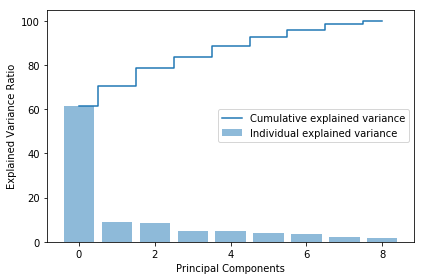

In [36]:
plt.figure(figsize=(6 , 4))
plt.bar(range(9), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(9), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [37]:
from sklearn.decomposition import PCA

In [38]:
pca = PCA(n_components=9)
pca.fit(cancer_df_z2)

PCA(copy=True, iterated_power='auto', n_components=9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

# Q7 Identify eigen values and eigen vector

In [39]:
# Step 2- Get eigen values and eigen vector

In [40]:
#eig_vals , eig_vecs = np.linalg.eig(cancer_cov)
pca.components_

array([[ 0.32460661,  0.39981149,  0.39395991,  0.32831561,  0.26150881,
         0.37553225,  0.35037797,  0.36062668,  0.09776561],
       [-0.86373493,  0.08546152,  0.03109196,  0.33905446,  0.18716051,
        -0.12528544,  0.06551917,  0.27483107, -0.01353826],
       [ 0.11385777,  0.19937082,  0.19810558, -0.48644814,  0.13805685,
        -0.64724768,  0.00348108,  0.48207193, -0.03186468],
       [ 0.01128744,  0.42363705,  0.44209278,  0.2325454 ,  0.11613891,
        -0.28950534, -0.42008437, -0.54485167, -0.01565424],
       [-0.33693075,  0.18975946,  0.26377074, -0.66568515,  0.12723389,
         0.38973607,  0.25392422, -0.30186397, -0.11863918],
       [-0.00821728, -0.05898359, -0.08606554, -0.17687756,  0.45301274,
         0.36037523, -0.71287415,  0.25703004,  0.2200355 ],
       [ 0.11558901, -0.12982851, -0.32448354,  0.04372361,  0.77160598,
        -0.22508215,  0.32916375, -0.31555995,  0.09283211],
       [-0.09093433,  0.18822196, -0.0876206 , -0.09629744, -0

In [41]:
pca.explained_variance_#eigen values

array([4.18580047, 0.60668797, 0.57724635, 0.33909398, 0.32158749,
       0.28014956, 0.2342691 , 0.15900884, 0.10750318])

In [42]:
pca.explained_variance_ratio_

array([0.61453344, 0.08907019, 0.08474775, 0.04978369, 0.04721349,
       0.04112983, 0.03439395, 0.0233447 , 0.01578295])

# Q8 Find variance and cumulative variance by each eigen vector

In [43]:

variance = pca.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features

array([ 61.5,  70.4,  78.9,  83.9,  88.6,  92.7,  96.1,  98.4, 100. ])

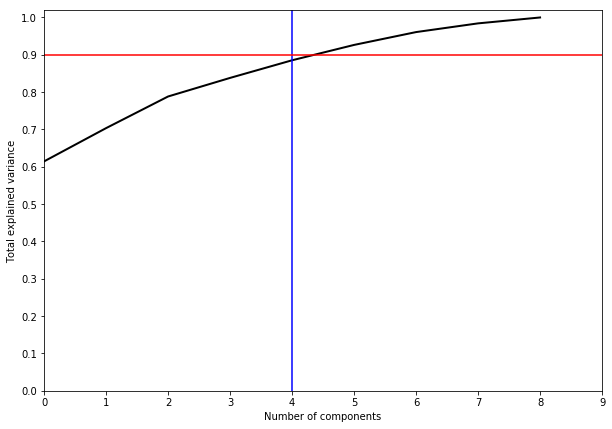

In [44]:
plt.figure(figsize=(10,7))

plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)

plt.xlabel('Number of components')
plt.ylabel('Total explained variance')

plt.xlim(0, 9)
plt.yticks(np.arange(0, 1.1, 0.1))

plt.axvline(4, c='b')
plt.axhline(0.9, c='r')

plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [45]:
pca.components_

array([[ 0.32460661,  0.39981149,  0.39395991,  0.32831561,  0.26150881,
         0.37553225,  0.35037797,  0.36062668,  0.09776561],
       [-0.86373493,  0.08546152,  0.03109196,  0.33905446,  0.18716051,
        -0.12528544,  0.06551917,  0.27483107, -0.01353826],
       [ 0.11385777,  0.19937082,  0.19810558, -0.48644814,  0.13805685,
        -0.64724768,  0.00348108,  0.48207193, -0.03186468],
       [ 0.01128744,  0.42363705,  0.44209278,  0.2325454 ,  0.11613891,
        -0.28950534, -0.42008437, -0.54485167, -0.01565424],
       [-0.33693075,  0.18975946,  0.26377074, -0.66568515,  0.12723389,
         0.38973607,  0.25392422, -0.30186397, -0.11863918],
       [-0.00821728, -0.05898359, -0.08606554, -0.17687756,  0.45301274,
         0.36037523, -0.71287415,  0.25703004,  0.2200355 ],
       [ 0.11558901, -0.12982851, -0.32448354,  0.04372361,  0.77160598,
        -0.22508215,  0.32916375, -0.31555995,  0.09283211],
       [-0.09093433,  0.18822196, -0.0876206 , -0.09629744, -0

In [46]:
pca.explained_variance_

array([4.18580047, 0.60668797, 0.57724635, 0.33909398, 0.32158749,
       0.28014956, 0.2342691 , 0.15900884, 0.10750318])

In [47]:
pca.explained_variance_ratio_

array([0.61453344, 0.08907019, 0.08474775, 0.04978369, 0.04721349,
       0.04112983, 0.03439395, 0.0233447 , 0.01578295])

# Q10 Find correlation between components and features

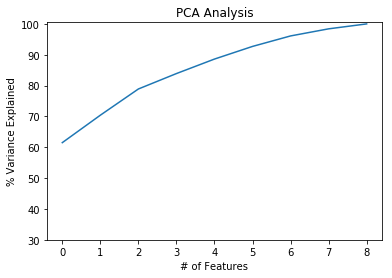

In [48]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(var)

In [49]:
new_pca = PCA(n_components = 4) 
new_pca = new_pca.fit_transform(cancer_df_z2)

In [50]:
pca_df = pd.DataFrame(new_pca, columns = ["PC1","PC2","PC3","PC4"])

In [51]:
cancer_df_z2 = cancer_df_z2.reset_index()
new_df_final =cancer_df_z2.copy()
new_df_final["PC1"] = pca_df["PC1"]
new_df_final["PC2"] = pca_df["PC2"]
new_df_final["PC3"] = pca_df["PC3"]
new_df_final["PC4"] = pca_df["PC4"]

In [52]:
new_df_final

,index,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,PC1,PC2,PC3,PC4
0,0,-0.128603,-0.993808,-1.050717,-0.864384,-0.763716,-0.965209,-0.453018,-0.838199,-0.437224,-1.763433,-0.527209,0.154374,-0.196604
1,1,-0.128603,-0.066930,-0.089079,0.403749,1.279716,1.357731,-0.453018,-0.543086,-0.437224,0.915479,0.184394,-1.166351,0.320112
2,2,-0.828263,-0.993808,-1.050717,-0.864384,-0.763716,-0.707105,-0.453018,-0.838199,-0.437224,-1.893620,0.044775,-0.092346,-0.279224
3,3,0.221227,1.168907,1.193104,-0.864384,-0.355030,-0.190896,-0.453018,0.932480,-0.437224,1.134987,-0.108658,1.478744,0.574067
4,4,-0.478433,-0.993808,-1.050717,-0.230317,-0.763716,-0.965209,-0.453018,-0.838199,-0.437224,-1.668816,-0.010066,-0.193898,-0.053104
5,5,0.920887,1.786826,1.834195,1.354849,1.279716,1.357731,1.817868,0.932480,-0.437224,4.395053,0.372929,-0.039689,0.430790
6,6,-1.527922,-0.993808,-1.050717,-0.864384,-0.763716,1.357731,-0.453018,-0.838199,-0.437224,-1.345322,0.390402,-1.508468,-0.884903
7,7,-1.178092,-0.993808,-0.730171,-0.864384,-0.763716,-0.965209,-0.453018,-0.838199,-0.437224,-1.977822,0.389238,0.098383,-0.066739
8,8,-1.178092,-0.993808,-1.050717,-0.864384,-0.763716,-0.965209,-1.209979,-0.838199,1.512157,-2.178744,0.303285,-0.029870,0.079021
9,9,-0.478433,-0.684849,-1.050717,-0.864384,-0.763716,-0.965209,-0.831499,-0.838199,-0.437224,-1.886076,-0.223442,0.174823,0.089328


In [53]:
new_df_final.corr()

,index,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,PC1,PC2,PC3,PC4
index,1.000000,-0.023010,0.034557,0.008185,0.052906,-0.076418,-0.057554,-0.068040,-0.059181,-0.090953,-2.777658e-02,2.113375e-02,-1.995987e-02,1.610522e-01
ClumpThickness,-0.023010,1.000000,0.549794,0.560064,0.353445,0.389137,0.506922,0.495988,0.435512,0.316065,6.841890e-01,-6.930948e-01,8.911950e-02,6.771501e-03
Cell Size,0.034557,0.549794,1.000000,0.864249,0.600897,0.666557,0.592758,0.682561,0.670799,0.374414,8.948572e-01,7.282198e-02,1.657110e-01,2.698753e-01
Cell Shape,0.008185,0.560064,0.864249,1.000000,0.570980,0.626204,0.598217,0.665084,0.653160,0.325052,8.822867e-01,2.650936e-02,1.647577e-01,2.818006e-01
Marginal Adhesion,0.052906,0.353445,0.600897,0.570980,1.000000,0.496431,0.609884,0.556285,0.491224,0.342681,7.376680e-01,2.900229e-01,-4.058796e-01,1.487127e-01
Single Epithelial Cell Size,-0.076418,0.389137,0.666557,0.626204,0.496431,1.000000,0.496544,0.549054,0.591435,0.344870,7.332175e-01,1.997810e-01,1.437460e-01,9.268192e-02
Bare Nuclei,-0.057554,0.506922,0.592758,0.598217,0.609884,0.496544,1.000000,0.611094,0.456132,0.357756,7.807953e-01,-9.917083e-02,-4.997488e-01,-1.713236e-01
Normal Nucleoli,-0.068040,0.495988,0.682561,0.665084,0.556285,0.549054,0.611094,1.000000,0.622329,0.294151,8.184509e-01,5.826632e-02,3.019684e-03,-2.792950e-01
Bland Chromatin,-0.059181,0.435512,0.670799,0.653160,0.491224,0.591435,0.456132,0.622329,1.000000,0.341048,7.788250e-01,2.259650e-01,3.866208e-01,-3.349123e-01
Mitoses,-0.090953,0.316065,0.374414,0.325052,0.342681,0.344870,0.357756,0.294151,0.341048,1.000000,4.422772e-01,-2.331657e-02,-5.353150e-02,-2.015632e-02


# Content Based Recommendation System - Optional ( Q11 - Q19 will not be graded)

# Q11 Read the Dataset `movies_metadata.csv`

# Q12 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

# Q13  Lets drop the null values in `description` column

# Q14 Keep the first occurance and drop duplicates of each title in column `title`

# Q15   As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

# Q16    Generate tf-idf matrix using the column `description`. Consider till 3-grams, with minimum document frequency as 0.

Hint:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')

# Q17  Create cosine similarity matrix

# Q18  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

Hint:

titles = df['title'] <br>
indices = pd.Series(df.index, index=df['title']) <br>

def recommend(title): <br>
    idx = indices[title] <br>
    sim_scores = list(enumerate(cosine_similarities[idx])) <br>
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) <br>
    sim_scores = sim_scores[1:31] <br>
    movie_indices = [i[0] for i in sim_scores] <br>
    return titles.iloc[movie_indices] <br>

# Q19 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q20 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [54]:
jokes_df = pd.read_csv("jokes.csv")
jokes_df.shape

(24983, 101)

# Q21 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [55]:
ratings = jokes_df.iloc[0:200,1:].copy()

In [56]:
ratings.shape

(200, 100)

# Q22 Change the column indices from 0 to 99

In [57]:
ratings.columns = np.arange(0,100,1)
ratings

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,99.00,99.00,99.00,99.00,8.59,-9.85,7.72,8.79,99.00,99.00,...,99.00,99.00,99.00,99.00,99.00,2.33,99.00,99.00,99.00,99.00
7,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,-4.42,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,-1.60,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,8.16,...,99.00,4.47,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


# Q23 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [58]:
ratings.replace(99.00,0.00,inplace = True)

In [59]:
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q24 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
ratings_diff = StandardScaler().fit_transform(ratings.values)
ratings_diff

array([[-1.85701632,  1.67164929, -2.21918089, ..., -0.02685824,
        -0.04144395, -0.16095388],
       [ 0.78949409, -0.1802773 ,  1.3727099 , ...,  0.07059963,
        -1.36765027,  0.16746078],
       [-0.11788091, -0.12112987, -0.0532842 , ..., -0.02685824,
        -0.04144395, -0.16095388],
       ...,
       [ 0.46479617, -0.89412566, -0.3156133 , ..., -0.23610604,
         0.18266036, -0.02590486],
       [-0.11788091, -0.12112987, -0.0532842 , ..., -0.02685824,
        -0.04144395, -0.16095388],
       [ 1.12308784, -1.60593445, -1.07569506, ..., -0.02685824,
        -0.04144395, -0.16095388]])

# Q25  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [62]:
type(ratings_diff)

numpy.ndarray

In [63]:
ratings_df = pd.DataFrame(ratings_diff,columns = ratings.columns, index = ratings.index)

In [64]:
X= pd.Series()
X = ratings_df.mean()

In [65]:
Y = pd.Series()
Y = X.sort_values(ascending = False)

In [66]:
Y.head(10)

98    1.840889e-16
81    1.243450e-16
97    1.198694e-16
20    1.065814e-16
94    1.054712e-16
92    8.770762e-17
47    7.771561e-17
73    7.743806e-17
99    7.549517e-17
49    7.494005e-17
dtype: float64